In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Radioactive decay chain

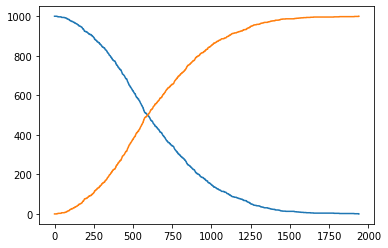

In [7]:
tau=3052*60
thallium=[1000]
lead=[0]
t=1

while(thallium[-1]>0):
  p=1-2**(-t/tau)
  count=0
  for i in range(thallium[-1]):
    count+=np.random.choice([1,0],p=[p,1-p])
  thallium.append(thallium[-1]-count)
  lead.append(lead[-1]+count)
  t = t + 1
plt.plot(np.arange(t),thallium)
plt.plot(np.arange(t),lead)

### 2. Rutherford Scattering

In [10]:
import numpy as np
import math
# number of electrons of Gold
Z =79
# plank constant
h=1.055*(10**(-34))
# mass of electron
m=9.109*(10**(-31))
# cloumb constant
k=8.988*(10**(9))
# load of electron
e=1.602*(10**(-19))
E=7.7*1e6*e
# vacuum permittivity
e0= 8.8541878128*(10**(-12))
# bhor radious
a0=(h**2)/(m*k*(e**2))
N=1000000
x = np.random.normal(0,a0/100,N)
y = np.random.normal(0,a0/100,N)
# cordinat
c = np.sqrt(np.power(x,2)+np.power(y,2))
theta=2*np.arctan((Z*e**2)/(2*math.pi*E*e0)/c)
print ("Percent of particles whose scattering angle is greater than θ > π/2 : ",(float(len(theta[theta>np.pi/2]))/N)*100,"%")

# V2 > define a function >>
def R_scatter(b, Z=79, E=7.7e6):
    e_  = 1.60217662e-19 #[C]
    e0_ = 8.854e-12      #[F/m]
    return 2 * np.arctan((Z * e_) / (2 * np.pi * e0_ * E * b))

a0_    = 5.29e-11 #[m]
sigma_ = a0/100
cov_   = [[sigma_,0],[0,sigma_]]
mean_  = [0,0]

N = 1000000
x = np.random.normal(0,sigma_,N)
y = np.random.normal(0,sigma_,N)

theta = R_scatter(np.sqrt(x**2 +y**2))

N_back = len(theta[theta>np.pi/2])

Percent of particles whose scattering angle is greater than θ > π/2 :  0.157 %


### 3. Monte Carlo integration: hit/miss vs mean value method

In [12]:
import math
def f(x):
    return (math.sin(1/(x*(2-x))))**2
N=10000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
result=2*count/N
error = 0.6745*math.sqrt(result*(2-result)/N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 1.4526 Error : 0.006014608593468989


Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [14]:
import math
def f(x):
    return (math.sin(1/(x*(2-x))))**2
def integral(starting,ending,N):
    width=(float(ending)-float(starting))/N
    Sum=0
    for i in range(N):
        height=f(starting+i*width)
        area=height*width
        Sum+=area
    return Sum
result=integral(0.0001,2,10000)
error = 0.6745*math.sqrt(result*(2-result)/N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 1.4510508516883263 Error : 0.006019900707352529


### 4. Monte Carlo integration in high dimension
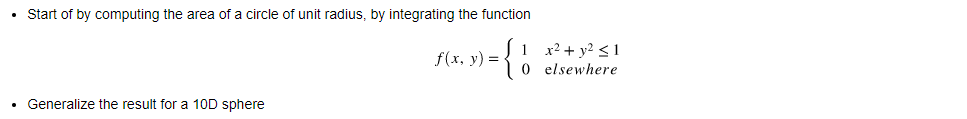

In [15]:
import math
def f(x):
    return math.sqrt(1-(x**2))

def integral(starting,ending,N):
    width=(float(ending)-float(starting))/N
    Sum=0
    for i in range(N):
        height=f(starting+i*width)
        area=height*width
        Sum+=area
    return 2*Sum

result=integral(-1,1,10000)
error = 0.6745*math.sqrt(result*(4-result)/N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 3.141589327430582 Error : 0.011076542411393666


Generalize the result for a 10D sphere

In [ ]:
def f(z):
    y=sum(x**2 for x in z)
    if y <=1: return 1
    else: return 0
N = 1000000
count=0
D=10
for i in range(N):
    x1=np.random.uniform(-1,1,D)
    if f(x1)==1: count+=1
volume=2**D
result=volume*(float(count)/float(N))
error = 0.6745*np.sqrt(result*(volume-result)/N)
print("Result of Integral :",result,"Error :",error)

### 5. Monte Carlo integration with importance sampling

In [17]:
import numpy as np
N = 10000
def function(x):
    return x**(-1/2)/(np.exp(x) + 1) 
def stp(x):
    return x*x/5
def w_function(x):
    if (x > 0):
        return 1/np.sqrt(x)
random=np.random.uniform(0,2,N)
dividing = np.array([function(i) for i in stp(random)])
divider = np.array([w_function(i) for i in stp(random)])
result = 2/N * np.sum(dividing/divider)
print(result)

0.8693270906450764


In [18]:
def f(x):
  return   x**(-0.5)/(np.e**x +1)
def w(x):
  return  x**(-0.5)
int_w=2
n=10000
samples=np.random.random(n)
f_sum=np.sum([f(x) for x in samples])/n
w_sum=np.sum([w(x) for x in samples])/n
I=int_w/w_sum*f_sum
print(I)

0.8364273942114346
